In [12]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import joblib
import json


In [13]:
target_col = "default.payment.next.month"


train = pd.read_csv("/home/danial/Data Science/Credit Risk Analysis/data/processed/Final/train.csv")
val   = pd.read_csv("/home/danial/Data Science/Credit Risk Analysis/data/processed/Final/val.csv")


X_train = train.drop(columns=[target_col])
y_train = train[target_col]
X_val   = val.drop(columns=[target_col])
y_val   = val[target_col]


In [14]:
lr = joblib.load("/home/danial/Data Science/Credit Risk Analysis/models/pipeline_logreg_v1.pkl")
gnb = joblib.load("/home/danial/Data Science/Credit Risk Analysis/models/pipeline_gnb_v1.pkl")


with open("/home/danial/Data Science/Credit Risk Analysis/models/baseline_metrics_v1.json", "r") as f:
    baseline_metrics = json.load(f)

print("Baseline metrics:", baseline_metrics)

Baseline metrics: {'LR': {'train_acc': 0.8069583333333333, 'val_acc': 0.8153333333333334, 'train_f1': 0.3969803462189249, 'val_f1': 0.4192872117400419}, 'GNB': {'train_acc': 0.399625, 'val_acc': 0.41533333333333333, 'train_f1': 0.39673435210383085, 'val_f1': 0.40823211875843457}}


In [15]:
lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_val_acc   = accuracy_score(y_val, lr.predict(X_val))
lr_train_f1  = f1_score(y_train, lr.predict(X_train))
lr_val_f1    = f1_score(y_val, lr.predict(X_val))

print("Logistic Regression:")
print("Train Acc:", lr_train_acc)
print("Val Acc:", lr_val_acc)
print("Train F1:", lr_train_f1)
print("Val F1:", lr_val_f1)


gnb_train_acc = accuracy_score(y_train, gnb.predict(X_train))
gnb_val_acc   = accuracy_score(y_val, gnb.predict(X_val))
gnb_train_f1  = f1_score(y_train, gnb.predict(X_train))
gnb_val_f1    = f1_score(y_val, gnb.predict(X_val))

print("\nGaussianNB:")
print("Train Acc:", gnb_train_acc)
print("Val Acc:", gnb_val_acc)
print("Train F1:", gnb_train_f1)
print("Val F1:", gnb_val_f1)

Logistic Regression:
Train Acc: 0.8069583333333333
Val Acc: 0.8153333333333334
Train F1: 0.3969803462189249
Val F1: 0.4192872117400419

GaussianNB:
Train Acc: 0.399625
Val Acc: 0.41533333333333333
Train F1: 0.39673435210383085
Val F1: 0.40823211875843457


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2337
           1       0.69      0.30      0.42       663

    accuracy                           0.82      3000
   macro avg       0.76      0.63      0.65      3000
weighted avg       0.80      0.82      0.79      3000


Classification Report - GaussianNB:
              precision    recall  f1-score   support

           0       0.92      0.27      0.42      2337
           1       0.26      0.91      0.41       663

    accuracy                           0.42      3000
   macro avg       0.59      0.59      0.42      3000
weighted avg       0.77      0.42      0.42      3000



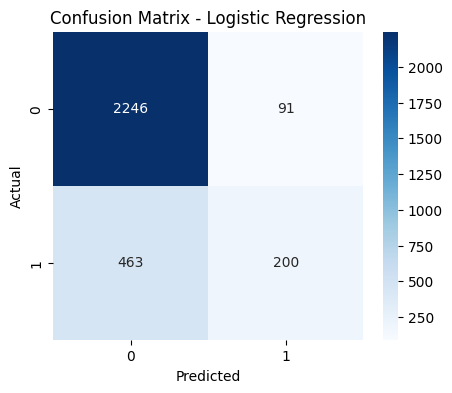

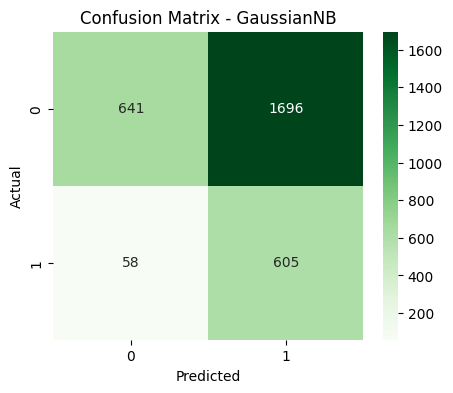

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print("Classification Report - Logistic Regression:")
print(classification_report(y_val, lr.predict(X_val)))

print("\nClassification Report - GaussianNB:")
print(classification_report(y_val, gnb.predict(X_val)))


cm_lr = confusion_matrix(y_val, lr.predict(X_val))
cm_gnb = confusion_matrix(y_val, gnb.predict(X_val))

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(5,4))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - GaussianNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:

lr_cv_f1 = cross_val_score(lr, X_train, y_train, cv=5, scoring="f1").mean()


gnb_cv_f1 = cross_val_score(gnb, X_train, y_train, cv=5, scoring="f1").mean()

print("Logistic Regression CV mean F1:", lr_cv_f1)
print("GaussianNB CV mean F1:", gnb_cv_f1)

Logistic Regression CV mean F1: 0.3970833200715167
GaussianNB CV mean F1: 0.3979602187448206


In [18]:
print("Summary:")

print("LR - Val Acc:", lr_val_acc, "Val F1:", lr_val_f1, "CV F1:", lr_cv_f1)
print("GNB - Val Acc:", gnb_val_acc, "Val F1:", gnb_val_f1, "CV F1:", gnb_cv_f1)

if lr_val_f1 > gnb_val_f1:
    print("\n✅ Logistic Regression seems better overall.")
else:
    print("\n✅ GaussianNB seems better overall.")


Summary:
LR - Val Acc: 0.8153333333333334 Val F1: 0.4192872117400419 CV F1: 0.3970833200715167
GNB - Val Acc: 0.41533333333333333 Val F1: 0.40823211875843457 CV F1: 0.3979602187448206

✅ Logistic Regression seems better overall.
